In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
import pandas as pd
# pd.options.mode.chained_assignment = None 
# import numpy as np
# import re
# import nltk
import matplotlib.pyplot as plt
from gensim.models import word2vec

from sklearn.manifold import TSNE

In [3]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('ruwikiruscorpora-superbigrams_skipgram_300_2_2018.vec.gz', binary=False)

/home/irina/env/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [113]:
baselines = open("baselines_no_pos.txt", "w")

In [114]:
for emb in model.wv.vocab:
    word, pos = emb.split("_")
    baselines.write("ru_" + word + " " + " ".join([str(number) for number in model.wv.get_vector(emb)]) + "\n")

/home/irina/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/home/irina/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
baselines.close()

In [87]:
import time
def tsne_plot(vocab, filename, save=True):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in vocab.keys():
        tokens.append(vocab[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    if save:
        plt.savefig(filename + str(time.time()) + ".png")
    plt.show()

In [5]:
russian_embs = {}

with open('en-ru.txt', 'r') as f:
    strings = f.readlines()
    for s in strings[36745:]:
        parts = s.split()
        if parts[0].startswith("ru_"):
            russian_embs[parts[0][3:]] = np.array([float(part) for part in parts[1:]], dtype=float)


In [107]:
white_list = ["дорогой", "дешевый", "сложный", "простой", "умный", "глупый", "интеллектуальный",
             "хитрый", "тупой", "острый", "собака", "кошка", "мать", "отец", "младенец", 
              "старик", "модный", "старый", "новый", "властный", "аморфный", "красивый", "некрасивый",
             "уродливый", "сонный", "радостный", "лучезарный", "грусть", "радость",
              "веселый", "песня", "мюзикл", "молодой", "свежий", "затхлый",  
              "простой", "выразительный", "невыразительный",
              "серый", "цветной", "яркий", "неяркий", #"тусклый", "бледный", "светлый", "темный", "мрачный",
              "пафосный", "скупой", "бодрый",
             "скупец", "щедрый","жадный", "жадность", "свобода",  "вывод",
#              "простор", "теснота", "просторный", "тесный", 
              "свободный", "близкий", "далекий", "удаленный",
             "приближенный", "приблизительный", "милость", "немилость", "смерть", "жизнь", "рождение",
             "юность", "молодость", "холодный", "жаркий", "летний", "прямой", "изогнутый",
             "близость", "родство", "родина", "чуждый", "знакомый", "незнакомый", "пряный", "соленый", "пресный",
             "глупец", "мудрец", "дурак",  "умница", "ум", "тупость"]

In [108]:
tuned_vocab = {}
for w in white_list:
    tuned_vocab[w] = russian_embs[w]

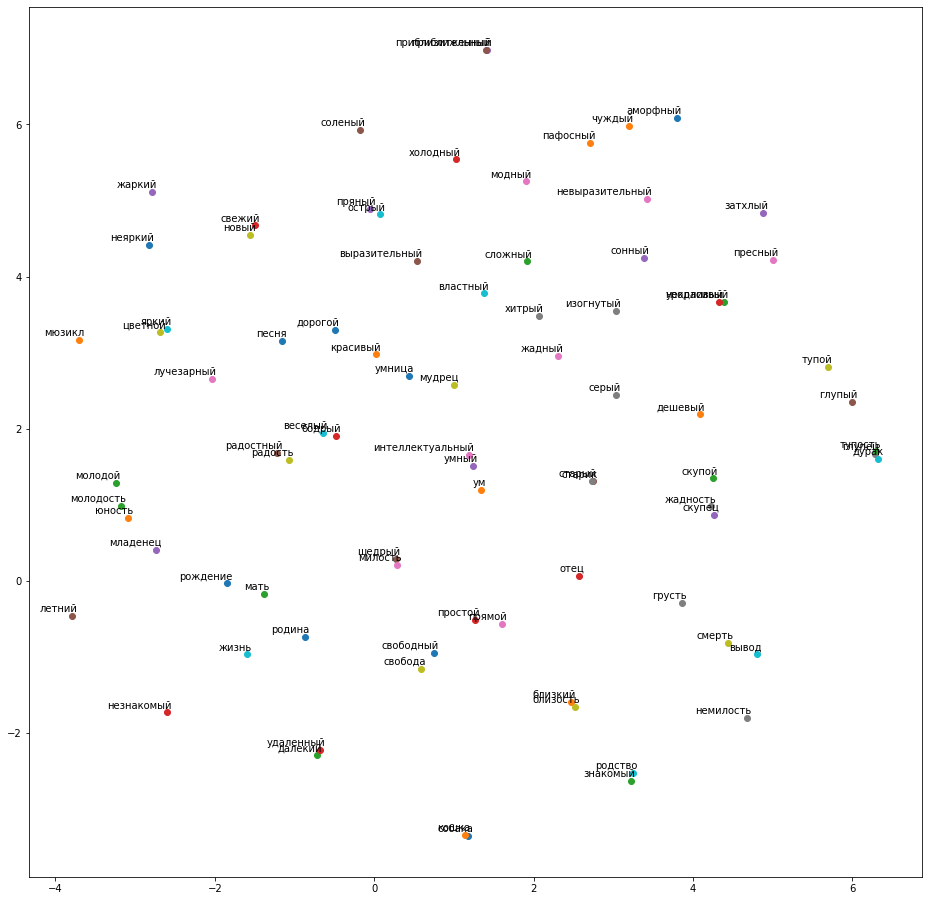

In [109]:
tsne_plot(tuned_vocab, "baseline")

In [110]:
 white_list = ["дорогой_ADJ", "дешевый_ADJ", "сложный_ADJ", "простой_ADJ", "умный_ADJ", 
               "глупый_ADJ", "интеллектуальный_ADJ",
             "хитрый_ADJ", "тупой_ADJ", "острый_ADJ", "собака_NOUN", "кошка_NOUN", "мать_NOUN", 
               "отец_NOUN", "младенец_NOUN", 
              "старик_NOUN", "модный_ADJ", "старый_ADJ", 
               "новый_ADJ", "властный_ADJ", "аморфный_ADJ", "красивый_ADJ", "некрасивый_ADJ",
             "уродливый_ADJ", "сонный_ADJ", "радостный_ADJ", "лучезарный_ADJ", "грусть_NOUN", "радость_NOUN",
              "веселый_ADJ", "песня_NOUN", "мюзикл_NOUN", "молодой_ADJ", "свежий_ADJ", "затхлый_ADJ",
               "простой_ADJ", "выразительный_ADJ", "невыразительный_ADJ",
              "серый_ADJ", "цветной_ADJ", "яркий_ADJ", "неяркий_ADJ",
              "пафосный_ADJ", "скупой_ADJ", "бодрый_ADJ",
             "скупец_NOUN", "щедрый_ADJ","жадный_ADJ", "жадность_NOUN", "свобода_NOUN",  "вывод_NOUN",
#              "простор", "теснота", "просторный", "тесный", 
              "свободный_ADJ", "близкий_ADJ", "далекий_ADJ", "удаленный_ADJ",
             "приближенный_ADJ", "приблизительный_ADJ", "милость_NOUN", 
               "немилость_NOUN", "смерть_NOUN", "жизнь_NOUN", "рождение_NOUN",
             "юность_NOUN", "молодость_NOUN", "холодный_ADJ", "жаркий_ADJ",
               "летний_ADJ", "прямой_ADJ", "изогнутый_ADJ",
             "близость_NOUN", "родство_NOUN", 
               "родина_NOUN", "чуждый_ADJ", "знакомый_ADJ", "незнакомый_ADJ", "пряный_ADJ", 
               "соленый_ADJ", "пресный_ADJ", "глупец_NOUN", "мудрец_NOUN", "дурак_NOUN",  "умница_NOUN", 
               "ум_NOUN", "тупость_NOUN"]

In [111]:
baselines_vocab = {}
for emb in white_list:
    baselines_vocab[emb] = model.wv.get_vector(emb)

/home/irina/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


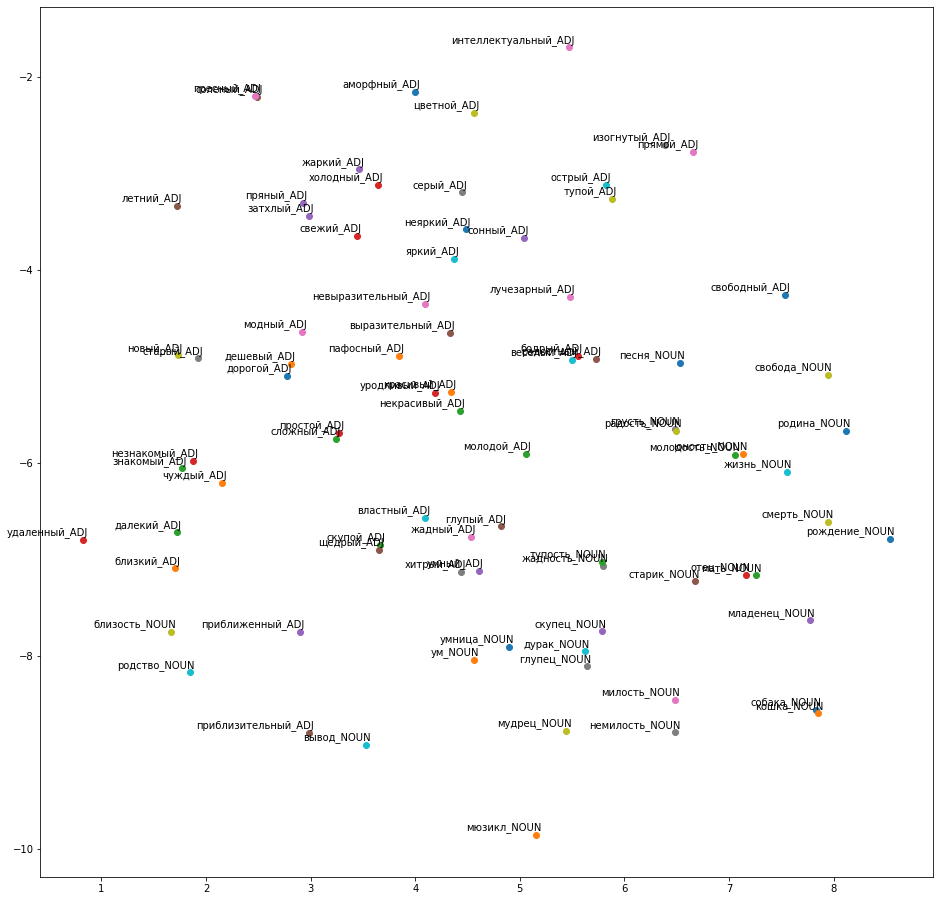

In [112]:
tsne_plot(baselines_vocab, "tuned")